<a href="https://colab.research.google.com/github/Muh-Ayyub/ML-Coursework/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the csv in its proper format using seperator ";"
df = pd.read_csv("bank-full.csv", sep = ";")

# Exploratory Data Analysis (EDA)

In [4]:
df.head(10) # Gain some idea about the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.shape # Find out the total number of rows and columns

(45211, 17)

In [6]:
df.info() # Check summarized information of each attribute (column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe() # Investigate Statistical results of the dataset

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum() # As you can see there are no missing values in the dataset

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
# Each unique value in a column along with their counts
for i in df:
  print(df[i].value_counts())
  print(" ")

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
 
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
 
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
 
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
 
default
no     44396
yes      815
Name: count, dtype: int64
 
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64
 
housing
yes    25130
no     20081
Name: count, dtype: int6

In [10]:
# Seperate columns into their respective types
numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous' , 'duration']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

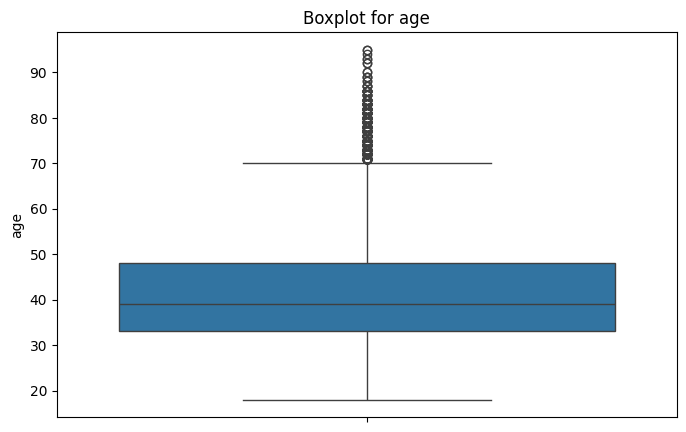

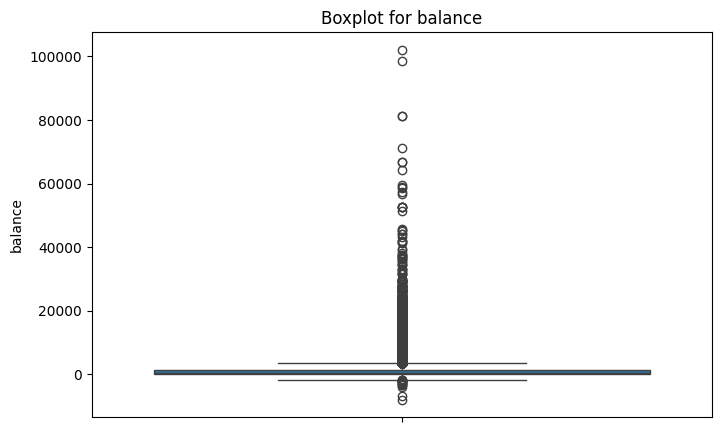

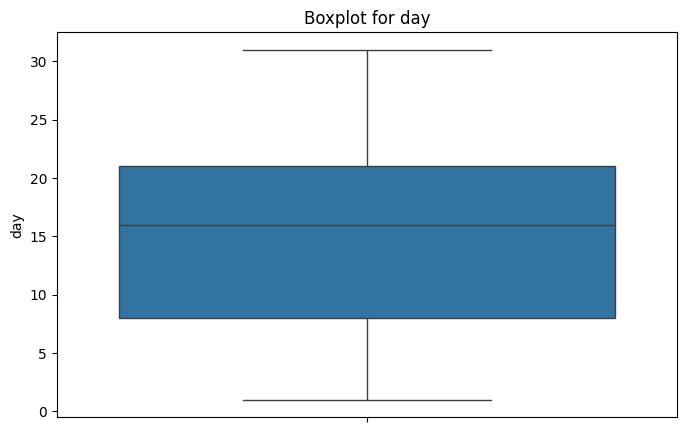

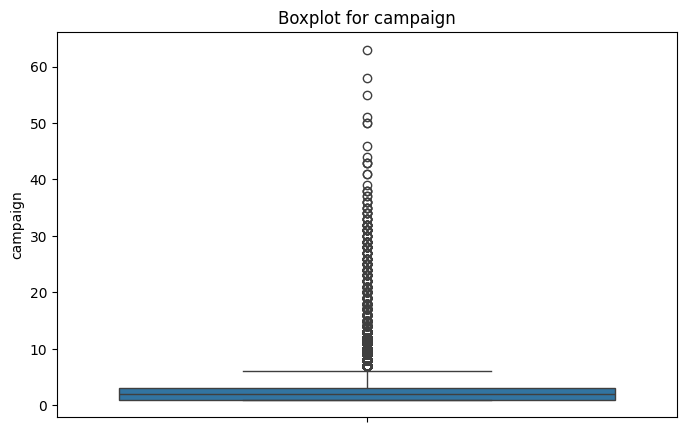

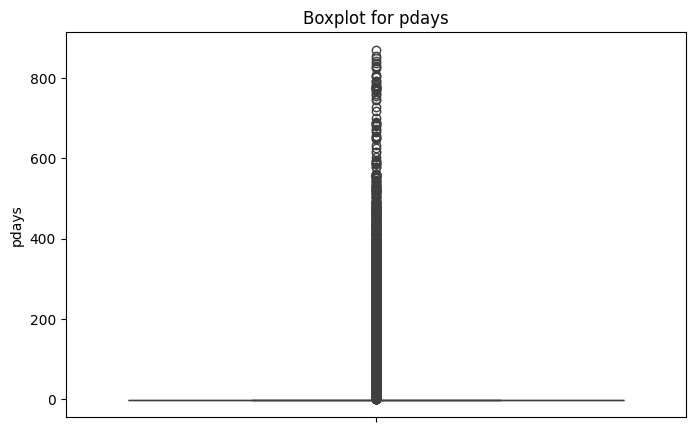

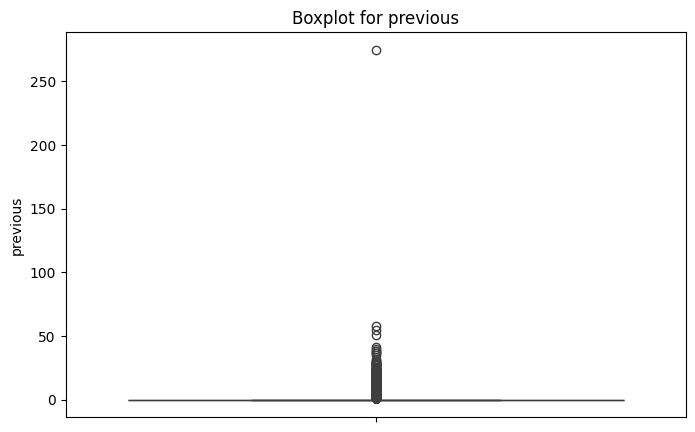

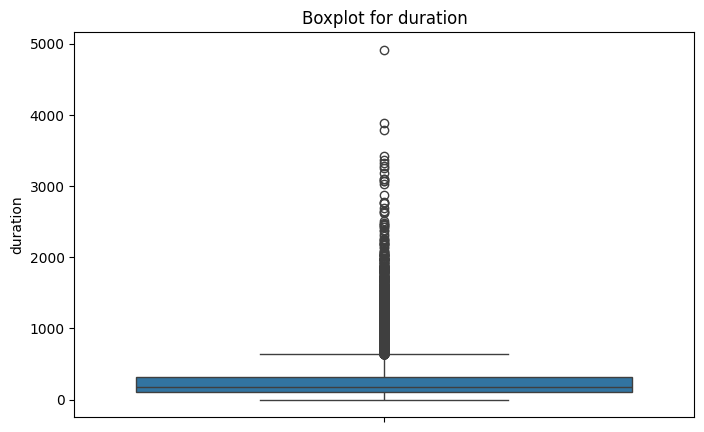

In [11]:
# Boxplots for each numerical column to identify significance of outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    print(" ")

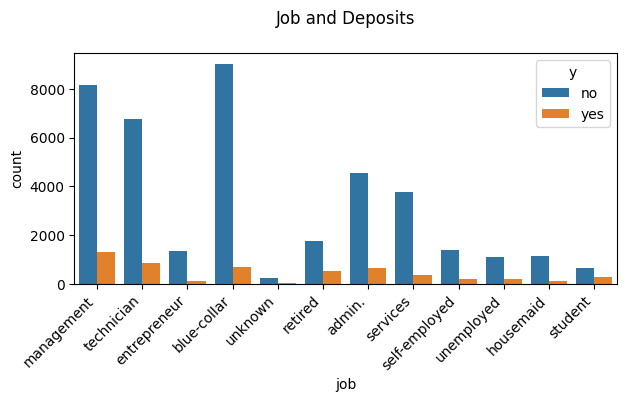

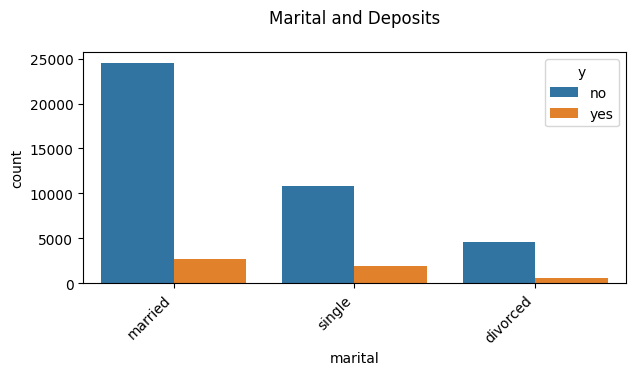

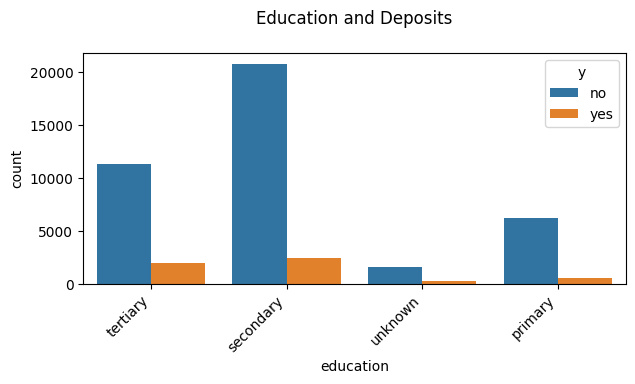

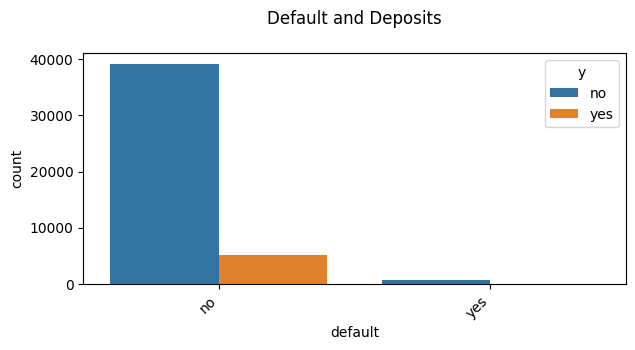

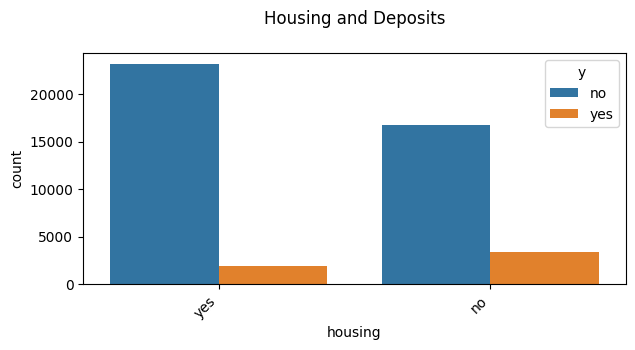

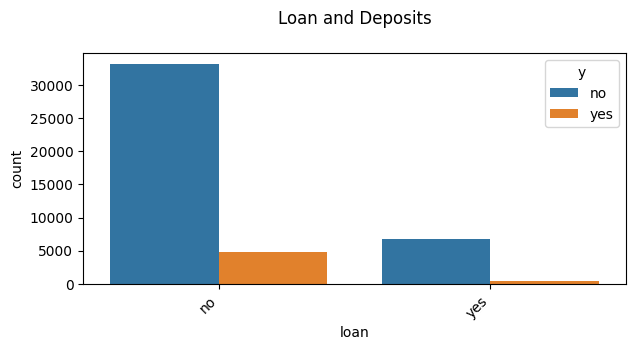

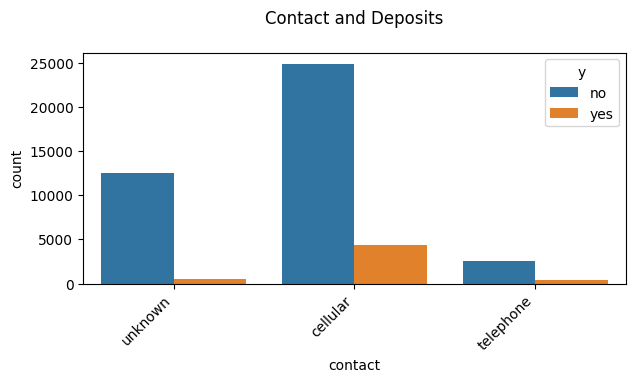

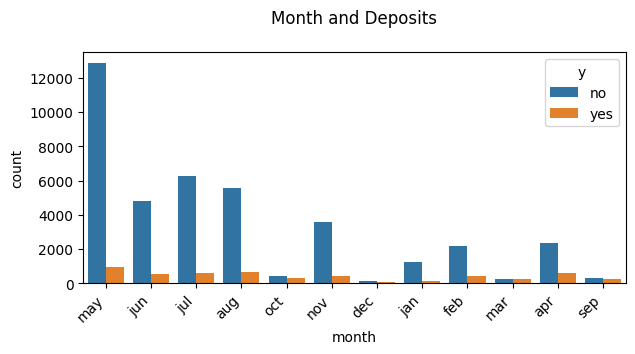

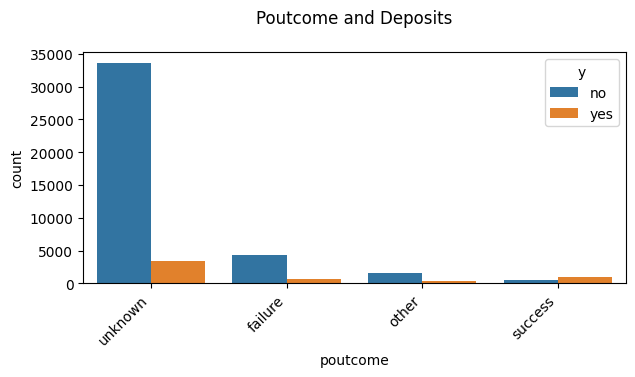

In [12]:
# Comparison of each categorical columns count with respect to the y attribute
for col in categorical_columns:
    plt.figure(figsize=(7, 3))  # Set figure size for each plot
    sns.countplot(x=col, data=df, hue="y")
    plt.title(f"{col.capitalize()} and Deposits\n")
    plt.xticks(rotation=45, ha="right")
    plt.show()
    print(" ")

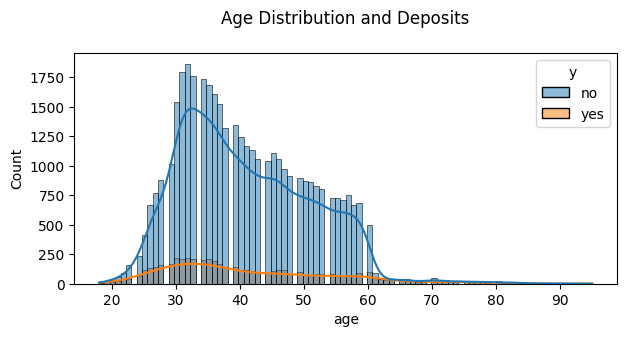

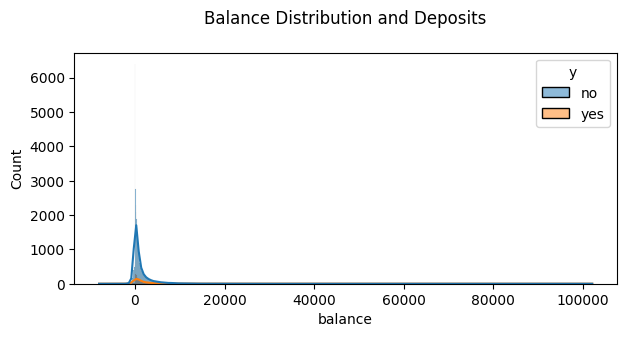

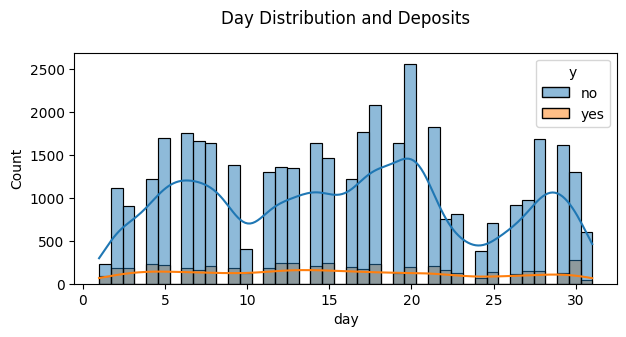

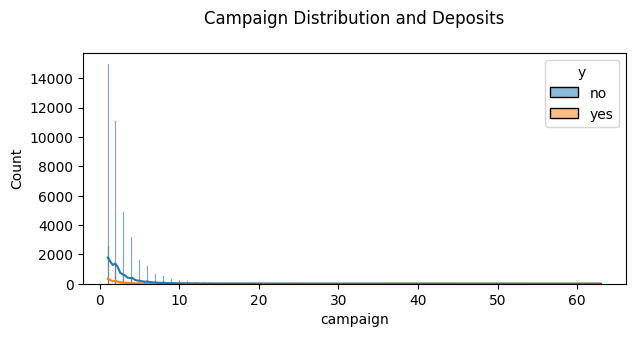

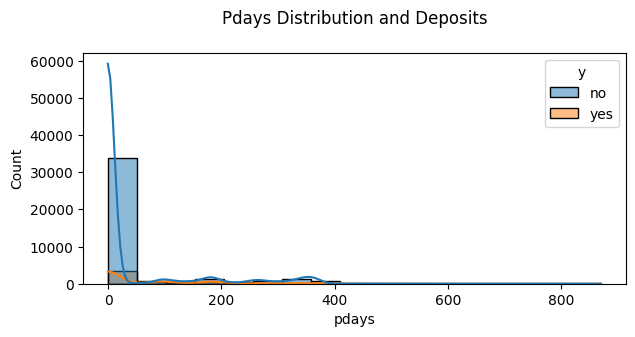

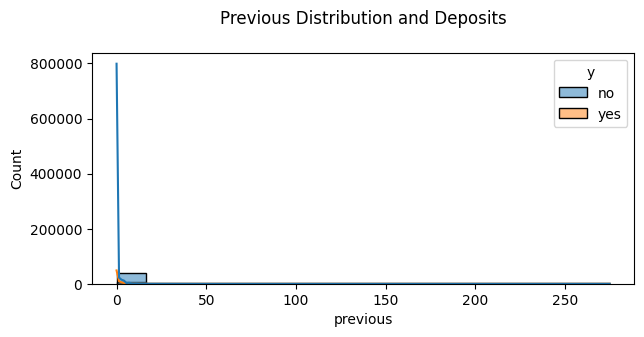

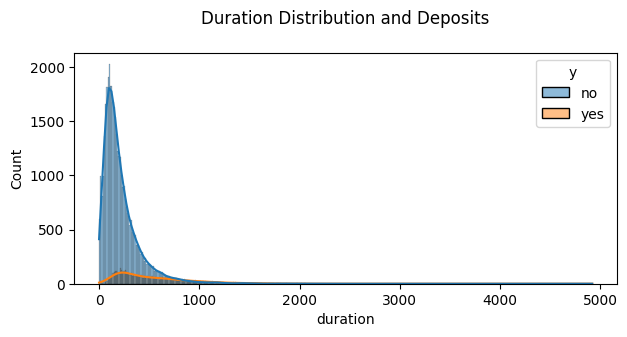

In [13]:
# Distribution of each numerical columns' count with respect to the y attribute
for col in numeric_columns:
    plt.figure(figsize=(7, 3))  # Set figure size for each plot
    sns.histplot(x=col, data=df, kde=True, hue="y")
    plt.title(f"{col.capitalize()} Distribution and Deposits\n")
    plt.show()
    print(" ")

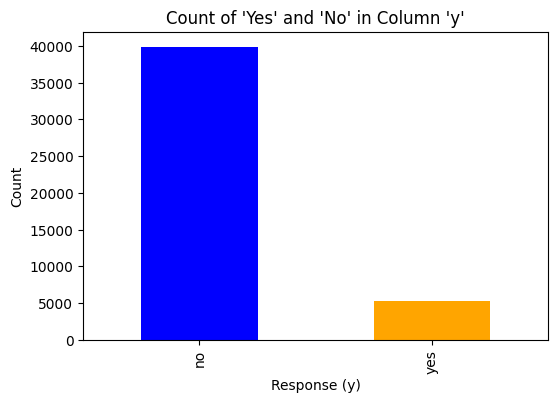

In [14]:
# Count of target attributes' values to check for imbalance
df['y'].value_counts().plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4), title="Count of 'Yes' and 'No' in Column 'y'")
plt.xlabel("Response (y)")
plt.ylabel("Count")
plt.show()

# Data Preprocessing - Cleaning And Preparing The Dataset

In [15]:
# Removing the outliers from each column

for i in numeric_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]


In [16]:
# Drop the columns that contain too many unknown values, which is accounted for as nan values too.

df.drop(columns=["contact","poutcome"],inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,16,nov,333,2,-1,0,no
45202,34,admin.,single,secondary,no,557,no,no,17,nov,224,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,17,nov,266,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,17,nov,386,2,-1,0,yes


In [17]:
# Drop duration column as according to the meta data of the dataset it highly affects output target variable y.
df.drop(columns = ["duration"], inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,16,nov,2,-1,0,no
45202,34,admin.,single,secondary,no,557,no,no,17,nov,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,17,nov,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,17,nov,2,-1,0,yes


In [18]:
# Check for any duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
       age          job  marital  education default  balance housing loan  \
2871    44     services   single  secondary      no        0     yes   no   
12939   25  blue-collar  married    primary      no        0      no   no   
13576   47     services  married  secondary      no        0     yes   no   
13662   47     services  married  secondary      no        0     yes   no   
15836   35   management  married   tertiary      no        0     yes   no   
16664   45  blue-collar  married    primary      no        0     yes   no   
19829   47   management  married  secondary      no        7      no   no   
21522   47   technician  married  secondary      no        0      no   no   
22157   31   management   single   tertiary      no        0      no   no   
22233   34   management   single   tertiary      no        0      no   no   
22418   30   technician   single   tertiary      no        0      no   no   
22445   32   management   single   tertiary      no        0

In [19]:
# Drop duplicates

df.drop_duplicates(inplace=True)

In [20]:
# Convert columns to appropriate data types
numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Data Preprocessing - Data Transformations

In [21]:
# Use two seperate datasets for neural networks model and random forest model
df_nn = df.copy()
df_rf = df.copy()

In [22]:
# Preparing the data for random forest model

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education','default', 'housing', 'loan', 'month', 'y']
binaryAndOrdinal_columns = ['education','default','housing','loan','y']
nominal_columns = ['job','marital','month']

for col in binaryAndOrdinal_columns:
    df_rf[col] = label_encoder.fit_transform(df_rf[col])

for col in nominal_columns:
    df_rf = pd.get_dummies(df_rf, columns=[col], drop_first=True)

# Scale numeric features
scaler = MinMaxScaler()
df_rf[numeric_columns] = scaler.fit_transform(df_rf[numeric_columns])

# Split the data into features (X) and target (y)
rf_X = df_rf.drop(columns=['y'])
rf_y = df_rf['y']

smote = SMOTE(random_state=42)
rf_X, rf_y = smote.fit_resample(rf_X, rf_y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [23]:
# Preparing the data for neural network model

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

for col in categorical_columns:
    df_nn = pd.get_dummies(df_nn, columns=[col], drop_first=True)

# Scale numeric features
scaler = MinMaxScaler()
df_nn[numeric_columns] = scaler.fit_transform(df_nn[numeric_columns])

# Split the data into features (X) and target (y)
nn_X = df_nn.drop(columns=['y'])
nn_y = df_nn['y']

# Data Preparation for Models

In [24]:
# Split into training and testing datasets
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

# Display the processed data
print("Training features shape:", rf_X_train.shape)
print("Testing features shape:", rf_X_test.shape)


Training features shape: (42433, 34)
Testing features shape: (10609, 34)


In [25]:
# Split into training and testing datasets
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(nn_X, nn_y, test_size=0.2, random_state=42)

# Display the processed data
print("Training features shape:", nn_X_train.shape)
print("Testing features shape:", nn_X_test.shape)

Training features shape: (22488, 36)
Testing features shape: (5623, 36)
